# <center> https://bit.ly/esaunggul-2020

<center><img alt="" src="images/Cover_EsaUnggul.png"/></center> 

## <center><font color="blue">(C) Taufik Sutanto - 2020</font></center>
<center> <strong>tau-data Indonesia</strong> ~ https://tau-data.id</center>

# <font color="blue">Outline</font>: Workshop Machine Learning via Python

* Pendahuluan
* Contoh 1: Bisnis Kuliner
* Contoh 2: Investasi Property
* Contoh 3: Social Media Analytics Sederhana

<img alt="" src="images/DS-SE.png"/>

# Penyamaan Persepsi Berbagai Cabang Ilmu Terkait Data

* **Statistika**: 1 hipotesis, 1 dataset  
 - bisa terdiri dari beberapa model, hipotesis diketahui di awal
* **Data Mining**: N hipotesis, 1-N dataset, Fokus ke Insight/Informasi (bukan akurasi seperti ML).
 - Normalnya beberapa model, hipotesis tidak ditentukan diawal, Stat & ML digunakan sebagai "tools" 
* **AI**: Sebuah sistem ML (superset ML)
 - Fokus ke akurasi & Automatisasi
* **Machine Learning**: Subset dari AI, biasanya hanya 1 task
 - Fokus ke akurasi & Automatisasi 
* **Data Science**: Statistik pada data terstruktur & Tidak terstruktur, Seperti Data Mining fokus ke Insight/Informasi.
 - Model/Algoritma lebih dari sekedar Tools, biasanya perlu modifikasi, sehingga perlu skill pemrograman.
* **Big Data**: Syarat utama Data & komputasi harus terdisribusi, tidak ada ukuran minimal data.
 - Biasanya pada data tidak terstruktur dan-atau streaming data. 

# Requirement & Instalasi:

* Google Colab atau Anaconda/WinPython.
* Disarankan Python 3.6
* Instalasi Module Python di Google Colab dapat dilakukan dengan menjalankan cell setelah ini.
* Untuk Anaconda/WinPython tingga menjalankan perintah di cell tsb diatas lewat terminal (misal command prompt di windows)
* Peserta diasumsikan sudah memiliki berbagai dasar Data Mining atau setidaknya Statistika Dasar.

In [ ]:
# Jalankan Cell ini "HANYA" jika anda menggunakan Google Colab
# Jika di jalankan di komputer local, silahkan lihat NLPTM-02 untuk instalasinya.
import warnings; warnings.simplefilter('ignore')
import nltk

!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ContohDataTweet.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

!pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi tweepy twython statsmodels
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

nltk.download('popular')

In [53]:
import taudataNlpTm as tau, tweepy
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
import statsmodels.formula.api as smf
import statsmodels.api as sm, scipy.stats as stats
from statsmodels.tools.eval_measures import rmse
from statsmodels.formula.api import ols
from tqdm import tqdm
from collections import Counter
plt.style.use('bmh'); sns.set()

# Latihan Studi Kasus I : Data Restaurant (Bisnis Kuliner)
## EDA - Dasar Statistik & Visualisasi 

Sebuah dataset dari suatu Restaurant memuat variabel-variabel berikut:
* total_bill: Total bill (cost of the meal), including tax, in US dollars
* tip: Tip (gratuity) in US dollars
* sex: Sex of person paying for the meal (0=male, 1=female)
* smoker: Smoker in party? (0=No, 1=Yes)
* day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
* time: 0=Day, 1=Night
* size: Size of the party
* https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset
* Image Source: https://upserve.com/restaurant-insider/restaurant-data-analytics/

<img alt="" src="images/restaurant_tips_data_ilustration.jpg"/>

In [4]:
# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)
# "Mengintip" beberapa data pertamanya
tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
print(tips.info())
set(tips['size'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


{1, 2, 3, 4, 5, 6}

In [6]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


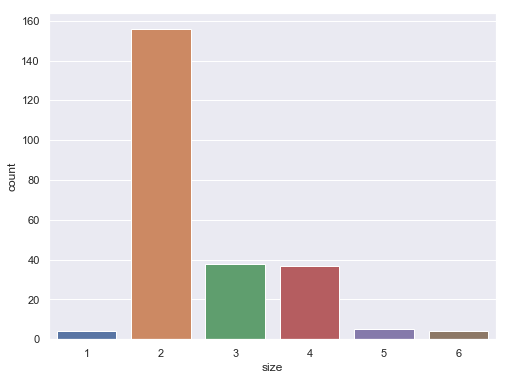

In [10]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="size", data=tips)

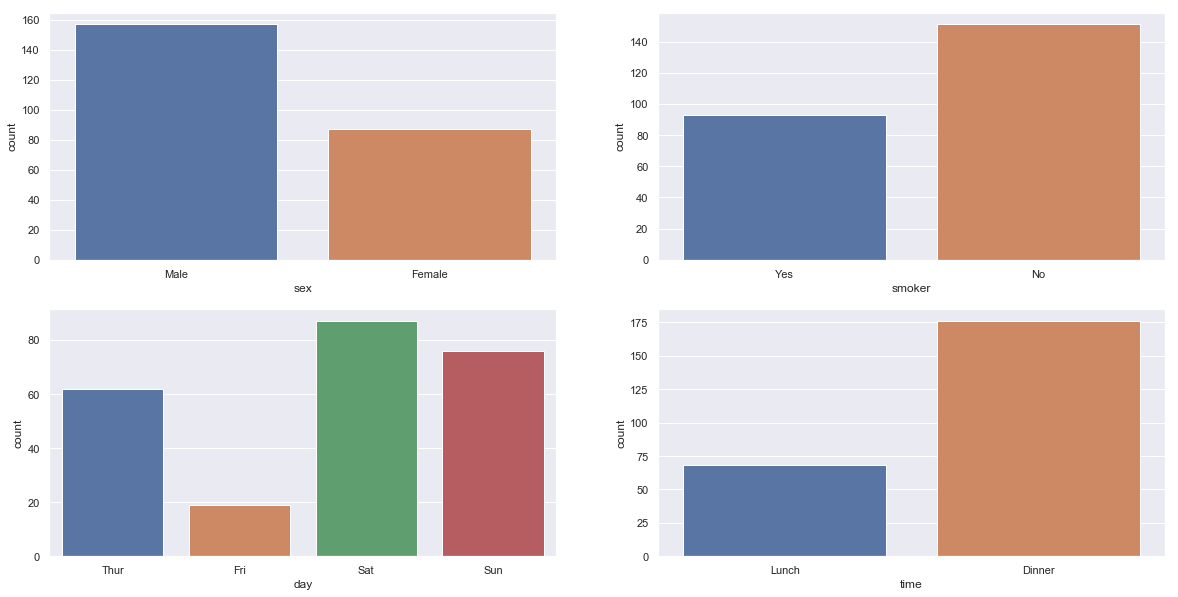

In [15]:
categorical = tips.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

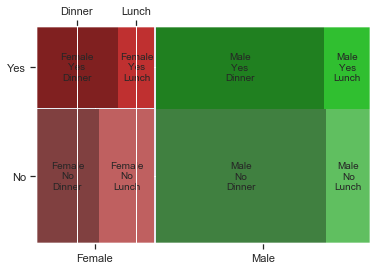

In [16]:
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

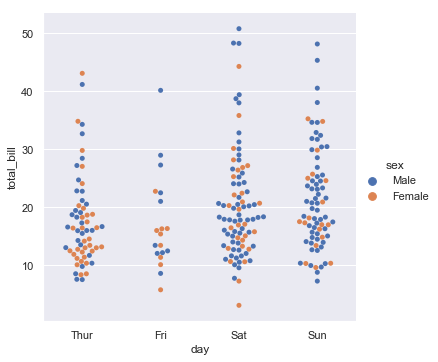

In [17]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

# Apa saja saran yang dapat diberikan ke Restaurant dari analisa data sederhana tadi?

# What's Next?

* Jika anda sudah memiliki bisnis, mulai dengan mengambil data kustomer anda.
* Gunakan membership/keanggotaan untuk membantu pengambilan data.
* Bisa juga melalui "kontes" di media sosial.
* Mulai analisa data tersebut untuk membuat data-driven decisions.

# Studi Kasus II: Investasi di Property
## EDA - Regresi 

* Misal seorang Data Scientist ditugaskan untuk menentukan investasi properti terbaik.
* Sumber Data: http://byebuyhome.com/ image source: https://www.maverickinvestorgroup.com/resources/real-estate-investment-analysis
* Variable:
 - **Dist_Taxi** – distance to nearest taxi stand from the property
 - **Dist_Market** – distance to nearest grocery market from the property
 - **Dist_Hospital** – distance to nearest hospital from the property
 - **Carpet** – carpet area of the property in square feet
 - **Builtup** – built-up area of the property in square feet
 - **Parking** – type of car parking available with the property
 - **City_Category** – categorization of the city based on the size
 - **Rainfall** – annual rainfall in the area where property is located
 - **House_Price** – price at which the property was sold

<img alt="" src="images/property-investment-analysis.jpg" />

In [2]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')
    
# Ukuran Data
N, P = price.shape
print('baris = ', N, ', Kolom = ', P)
# "Mengintip" beberapa data pertamanya
price.head()

baris =  936 , Kolom =  10


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [20]:
price.describe(include='all')

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,936.000000,923.000000,923.000000,935.000000,928.000000,921.000000,936,936,936.000000,9.360000e+02
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,373,365,NaN,NaN
mean,468.500000,8239.512459,11039.122427,13082.894118,1511.558190,1794.610206,NaN,NaN,786.730769,6.089048e+06
std,270.344225,2561.188953,2565.058074,2586.507654,789.370074,467.395372,NaN,NaN,266.218109,5.015046e+06
min,1.000000,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,3.000000e+04
25%,234.750000,6481.500000,9366.000000,11308.000000,1318.000000,1583.000000,NaN,NaN,600.000000,4.661000e+06
50%,468.500000,8233.000000,11166.000000,13179.000000,1481.000000,1775.000000,NaN,NaN,780.000000,5.879500e+06
75%,702.250000,9967.000000,12688.500000,14848.000000,1653.500000,1982.000000,NaN,NaN,970.000000,7.187250e+06


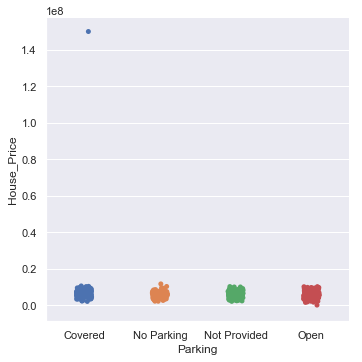

In [28]:
p= sns.catplot(x="Parking", y="House_Price", data=price)
# Apa yang bisa dilihat dari hasil ini?

In [3]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.dropna(how='all', inplace=True)
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


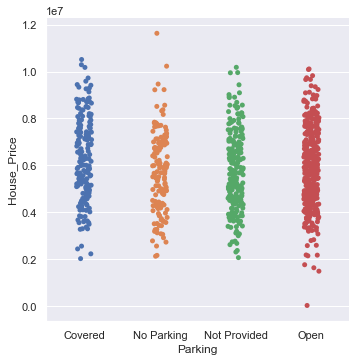

In [27]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

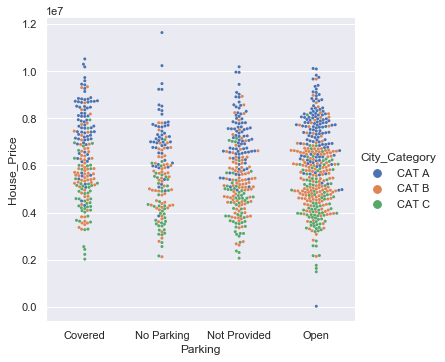

In [37]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", s=3, data=price2)

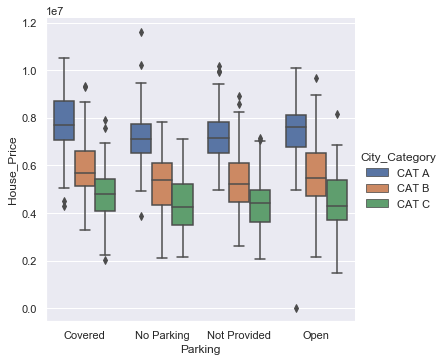

In [38]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

# Supervised Learning: Regression Analysis

* Studi Kasus (Boston House Pricing) - Another Property Case Study
* Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
* https://tau-data.id/glm-01/ dan https://tau-data.id/asumsi-statistika-benci-butuh/
<img alt="" src="images/Regression-model.jpg" />

In [46]:
from sklearn.datasets import load_boston
boston = load_boston()

# Convert ke Pandas Dataframe
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(boston.DESCR)
bos.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


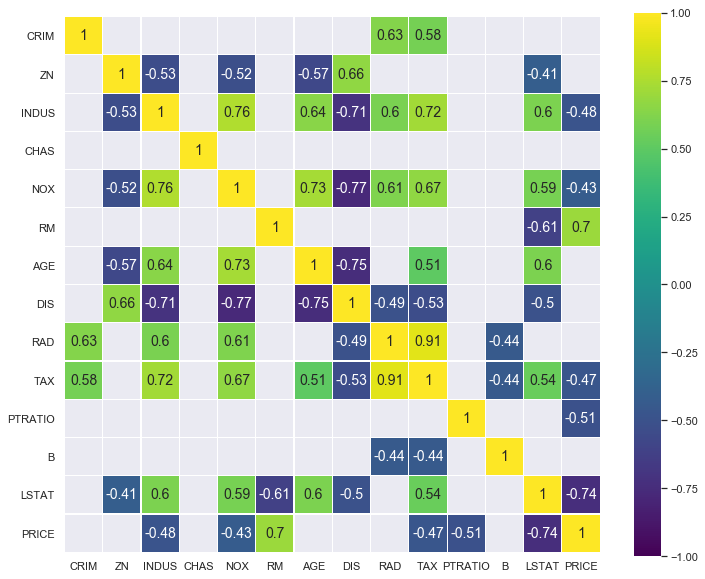

In [24]:
# HeatMap untuk menyelidiki korelasi
corr2 = bos.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

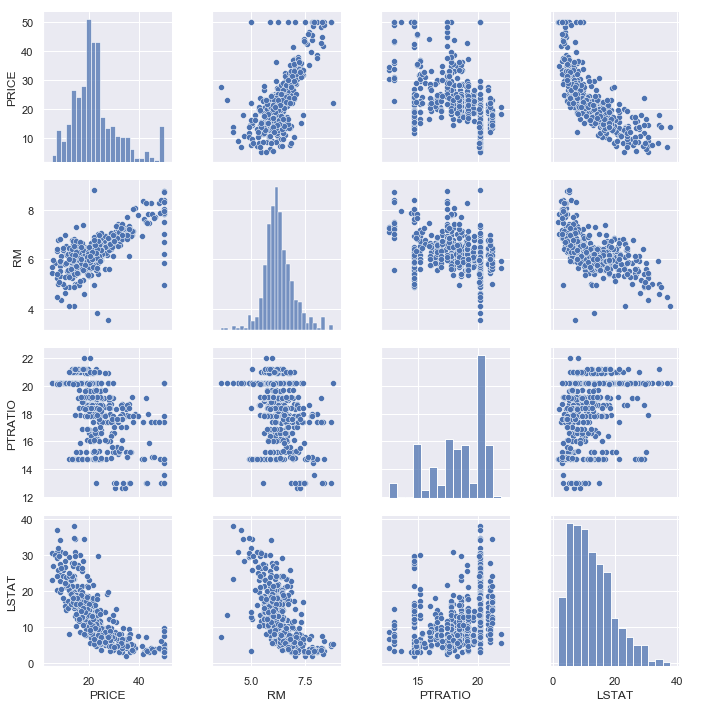

In [31]:
p = sns.pairplot(bos[['PRICE', 'RM', 'PTRATIO', 'LSTAT']])

In [48]:
res = ols('PRICE ~ RM + PTRATIO + np.log(LSTAT)', bos).fit()
print(res.params)
print(res.summary())
rmse(bos.PRICE, res.predict(bos[['RM', 'PTRATIO', 'LSTAT']]))

Intercept        36.911810
RM                3.268179
PTRATIO          -0.761914
np.log(LSTAT)    -8.796745
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     460.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.25e-143
Time:                        13:45:44   Log-Likelihood:                -1505.8
No. Observations:                 506   AIC:                             3020.
Df Residuals:                     502   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----

4.7445430431595765

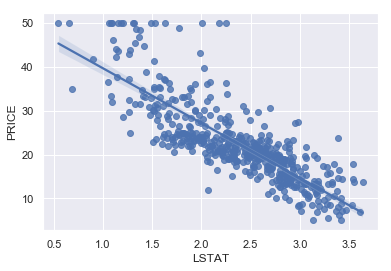

In [49]:
p = sns.regplot(np.log(bos.LSTAT), bos.PRICE)

<img alt="" src="images/models_wrong_some_useful.png" />

### Perfect/true-best model tidak ada, bahkan seringnya tidak diperlukan

# Apa saja saran yang dapat diberikan ke Perusahaan Property dari analisa data sederhana tadi?

# What's Next?

* Crawls/Scrap data realtime dari situs penjual property.
* Lakukan (near) realtime anaysis setiap waktu tertentu.
* Atur "notifikasi" setiap ada investasi yang berpotensi menguntungkan.

# Studi Kasus III: Harvesting Social Media

* SMA adalah sebuah proses pengumpulan data dari media sosial dan analisanya untuk mendapatkan "insights" atau informasi berharga untuk suatu tujuan tertentu (definisi diadopsi dari Gartner*).
* https://tau-data.id/sma-01/

<img alt="" src="images/8_SMA.JPG" />

<h1 id="Crawling-Data">Crawling/Scrapping Data</h1>

<p><img alt="" src="images/Digital_Media_Crawling_.png" /></p>

* Credits, image source: https://www.promptcloud.com/blog/scraping-social-media-data-for-sentiment-analysis/

<h3 id="Social-Media-Analytics-Challenges"><u>Tantangan Social Media Analytics</u></h3>

<ul>
	<li>
	<p>Pendek (<strong>Short </strong>in lengths): bahkan terkadang tidak mengandung sebuah kalimat yang utuh menurut tata bahasa (grammar).</p>
	</li>
	<li><strong>Noise&nbsp;</strong>: Data media sosial penuh dengan noise seperti typos (salah ketik), encoding yang tidak jamak, slang, dsb.</li>
	<li><strong>Temporal&nbsp;</strong>: Informasi yang sedang trending biasanya hanya sesaat,<br />
	sehingga SMA diharapkan dilakukan dengan cepat menggunakan model-model/teknik-teknik analisa data yang efisien.</li>
	<li><strong>High-dimensional</strong> : Data di Media Sosial (Teks, Gambar, Video, Suara, dsb) adalah data tidak terstruktur berdimensi tinggi.</li>
	<li><strong>Fine-grained</strong> : Data di media sosial berasal dari banyak user yang masing-masingnya bisa jadi membahas beberapa topik yang berbeda.<br />
	Sehingga komunitas (kelompok), topik, maupun klasifikasi yang ada menjadi besar (fine-grained).</li>
	<li><strong>Large in volume</strong>&nbsp;&amp; <strong>High velocity</strong>:&nbsp; Data yang sangat besar dan bertambah besar dengan cepat.</li>
	<li><strong>A lot of external Information</strong> : Informasi terkadang lebih banyak terkandung dari luar (eksternal) seperti url website, video, atau hal lain yang dibagikan oleh pengguna media sosial.</li>
</ul>


<h2 id="Case-Study:-twitter">Case Study: twitter</h2>
<ol>
	<li>API Keys</li>
	<li>Rules</li>
	<li>Crawling by searching</li>
    <li>tweet Json</li>
	<li>Crawling by Streaming and Scrapping</li>
    <li>twitter Social Media Analytics</li>
</ol>
<img alt="" src="images/6_twitter.png" style="width: 300px; height: 300px;" />

<h2>twitter API Keys</h2>

<h2><img alt="" src="images/6_Creating_API_Keys.png" style="width: 854px ; height: 444px" /></h2>


<h2 id="Aturan-twitter">Aturan, bentuk data, &amp; error codes twitter</h2>

<ol>
	<li>
	<p><a href="https://dev.twitter.com/rest/public/rate-limiting" target="_blank">https://</a><a href="https://dev.twitter.com/rest/public/rate-limiting" target="_blank">dev.twitter.com/rest/public/rate-limiting</a></p>
	</li>
	<li>
	<p><a href="https://dev.twitter.com/overview/terms/agreement-and-policy" target="_blank">https://dev.twitter.com/overview/terms/agreement-and-policy</a></p>
	</li>
	<li>
	<p><a href="https://dev.twitter.com/overview/api/response-codes" target="_blank">https://</a><a href="https://dev.twitter.com/overview/api/response-codes" target="_blank">dev.twitter.com/overview/api/response-codes</a></p>
	</li>
	<li>
	<p><a href="https://dev.twitter.com/overview/api/tweets" target="_blank">https://</a><a href="https://dev.twitter.com/overview/api/tweets" target="_blank">dev.twitter.com/overview/api/tweets</a></p>
	</li>
</ol>


In [50]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)
Ck = '' # consumer_key
Cs = '' # consumer_secret
At = '-' # access_token
As = '' # access_secret
'Done'

'Done'

In [51]:
def twitter_connect(Ck, Cs, At, As, verbose = 0):
    try:
        auth = tweepy.OAuthHandler(Ck, Cs)
        auth.set_access_token(At, As)
        twitter = tweepy.API(auth, timeout=120)
        if verbose != 0:
            user = twitter.verify_credentials()
            print('Welcome "%s" you are now connected to twitter server' %user.name)
        return twitter
    except Exception as err_:
        print("Connection failed: ", err_)
        return None

In [54]:
# Koneksi ke twitter
twitter = twitter_connect(Ck, Cs, At, As, verbose = 1)

Welcome "Taufik Sutanto" you are now connected to twitter server


<h2 id="Json-Files">Json Files</h2>

<ul>
	<li>Populer digunakan untuk data dari Media Sosial dan NoSQL</li>
	<li>Portable: File Json memuat nama variabel dan nilainya (tidak seperti XML)</li>
	<li>Plain Text</li>
	<li>Schemaless: Setiap record tidak harus memiliki jumlah field yang tetap seperti csv</li>
	<li>JSON isomorfis dengan &quot;Dictionary&quot; di Python</li>
	<li>Contoh struktur file json:</li>
</ul>

<p><img alt="" src="images/json.png" style="width: 200px; height: 211px;" /></p>


In [55]:
# Max 100 tweet per "API call"
topic = 'vaksin covid indonesia'
N = 100 # jumlah tweet yang ingin diambil
bahasa = 'id'
T = twitter.search(q=topic, lang=bahasa, count=N, tweet_mode = 'extended')
tweets = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweets)))

 Berhasil mendapatkan 100 tweets


In [56]:
# Datanya berbentuk JSON
tweets[0]['created_at'], tweets[0]['full_text']

('Mon Dec 14 07:09:33 +0000 2020',
 'RT @hikmatdarmawan: Rakyat disuruh berpikir ekonomi bertentangan dengan kesehatan. \n\nJangkauan tes rendah. \n\nLalu, bansos Covid-19 dikorups…')

In [30]:
tweets[0]

{'created_at': 'Wed Oct 21 00:54:05 +0000 2020',
 'id': 1318717158247989249,
 'id_str': '1318717158247989249',
 'full_text': 'RT @TRANSTV_CORP: Masuk kembali ke masa PSBB Transisi, kini traveler bisa kembali melangsungkan pernikahan di hotel. Hanya wajib lapor dulu…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'TRANSTV_CORP',
    'name': 'TRANS TV',
    'id': 125225621,
    'id_str': '125225621',
    'indices': [3, 16]}],
  'urls': []},
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1088628266263441408,
  'id_str': '1088628266263441408',
  'name': 'maher',
  'screen_name': 'maher68554742',
  'locat

In [57]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweets[0]['user']['screen_name'],tweets[0]['full_text']))

tweet pertama oleh "ardillapramono" : "RT @hikmatdarmawan: Rakyat disuruh berpikir ekonomi bertentangan dengan kesehatan. 

Jangkauan tes rendah. 

Lalu, bansos Covid-19 dikorups…"


# Bagaimana kalau mau mengambil data lebih banyak

In [58]:
# Next data
last_id = T[-1]._json['id'] - 1
last_id

1338351006690603009

In [67]:
T = twitter.search(q=topic, lang=bahasa, count=N, tweet_mode = 'extended', max_id=last_id)
tweets.extend([t._json for t in T])

print('Jumlah data sekarang = ', len(tweets))

Jumlah data sekarang =  1000


# Lalu Loop terus sampai "T" False (kosong/None)

* Silahkan modifikasi dengan menggunakan Looping "while" sebagai latihan.
* Untuk kesempatan kali ini kita hanya akan menganalisa data Tweet-nya saja.

In [74]:
data = [t['full_text'] for t in tweets]
len(data)

1000

# PreProcessing

### Detail lebih lanjut di https://tau-data.id/nlptm-01/

In [75]:
stopwords = {'rt', '..'}
for i, d in enumerate(data):
    data[i] = tau.cleanText(d, stops = stopwords, symbols_remove = True, min_charLen = 3, fixTag= True)
    
print(data[:2])

['hikmatdarmawan rakyat disuruh berpikir ekonomi bertentangan dengan kesehatan jangkauan tes rendah lalu bansos covid dikorups', 'hikmatdarmawan rakyat disuruh berpikir ekonomi bertentangan dengan kesehatan jangkauan tes rendah lalu bansos covid dikorups']


In [77]:
# Pertama-tama kita perlu menyimpan tweet yang telah dilakukan preprocessing diatas sebagai file teks biasa
# Menggunakan cara yang dibahas di hari pertama
namaFile = 'ContohDataTweet.txt'
with open(namaFile, 'w') as f:
    for d in data:
        f.write(d + '\n')
'Done'

'Done'

<h2>Text Analytics</h2>

<ul>
	<li>Tidak seperti data terstruktur, data tidak terstruktur seperti teks termasuk salah satu data yang cukup sulit untuk divisualisasikan.<br />
	<img alt="" src="images/11_charts.jpg" style="height:150px; width:276px" /></li>
	<li>Namun terdapat Tools seperti Voyant yang dapat membantu dalam visualisasi sekaligus analisis.<br />
	<img alt="" src="images/11_voyant.png" style="height:118px; width:426px" /></li>
</ul>

### Voyant dapat digunakan dalam 2 cara:

* Online: https://voyant-tools.org/
* Offline di komputer kita [Java Based]

<h3 id="Penggunaan-Voyant-1:-WordClouds">Penggunaan Voyant 1: WordClouds</h3>

<ol>
	<li>Upload teks yang akan di analisa: hasil cluster/ suatu kategori/ topics / raw text.</li>
	<li>slider terms: mengkontrol banyaknya terms yang disertakan.</li>
	<li><strong>Summary </strong>(statistics)</li>
	<li><strong>Documents </strong>==&gt; add more</li>
	<li><strong>Phrases </strong>(n-grams like)</li>
	<li><strong>Export </strong>Visualisasi (kanan atas - pertama)</li>
	<li><strong>Options </strong>(kanan atas ke-3): Font, size, stopwords, whitelist</li>
	<li>&quot;?&quot; ==&gt; More Help</li>
</ol>

<p>&nbsp;</p>


<h3 id="Penggunaan-Voyant-2:-Bubbles">Penggunaan Voyant 2: Bubbles</h3>

<ol>
	<li>Upload teks yang akan di analisa: hasil cluster/ suatu kategori/ topics / raw text.<br />
	Atau file yang sudah terupload sebelumnya</li>
	<li>&nbsp;Klik tanda 4-kotak kecil (kanan atas ke-3)</li>
	<li>Pilih Visualization Tools ==&gt; Bubbles</li>
	<li>Option: hanya stopwords</li>
	<li>Export: Hanya PNG</li>
</ol>

<p>&nbsp;</p>


<h3 id="Penggunaan-Voyant-3:-Word-Tree">Penggunaan Voyant 3: Word Tree</h3>

<ol>
	<li>Upload teks yang akan di analisa: hasil cluster/ suatu kategori/ topics / raw text.<br />
	Atau file yang sudah terupload sebelumnya</li>
	<li>Klik branch untuk expand</li>
</ol>


<h3 id="Penggunaan-Voyant-2:-Bubbles">Penggunaan Voyant 4: Links</h3>

<ol>
	<li>Upload teks yang akan di analisa: hasil cluster/ suatu kategori/ topics / raw text.<br />
	Atau file yang sudah terupload sebelumnya</li>
	<li>Visualization Tools ==&gt; Links</li>
	<li>Klik sembarang terms untuk expand</li>
</ol>


<h3 id="Penggunaan-Voyant-5:-Trends">Penggunaan Voyant 5: Trends</h3>

<ol>
	<li>Upload teks yang akan di analisa: hasil cluster/ suatu kategori/ topics / raw text.<br />
	Atau file yang sudah terupload sebelumnya</li>
	<li>Document Tools ==&gt; Trends</li>
	<li>.. Butuh preprocessing ...&nbsp;</li>
	<li>Data harus terurut waktu</li>
	<li>Berikut contohnya</li>
</ol>


# Catatan Text Analytics

* Dalam Kasus nyata TA dilakukan per kategori (i.e. Pos, Neg, Net)
* TA di seluruh data dapat menjadi gambaran seberapa bersih data.
* Insight sederhana dapat dihasilkan dari SA

# What's Next?

* Mulai dengan latihan mengambil data dari berbagai sumber digital.
* Simpan data dalam databse yang sesuai
* Buat Realtime Sentimen Analysis + Notifikasi
* Buat model yang lebih advance: topic Modelling, SNA, dsb.

# <center><font color="blue"> End of Module

<hr />
<img alt="" src="images/.png" />